In [1]:
#https://blog.quantinsti.com/linear-regression-models-scikit-learn/#dataset-scikit

#Pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

#matplotlib.pyplot is used to create plot
import matplotlib.pyplot as plt
%matplotlib inline

#train_test_split splits dataset to training and test data and able to randomize the data
from sklearn.model_selection import train_test_split

#Metrics which include MSE: Mean squared error, mae: mean absolute error
from sklearn import metrics

#GridSearchCV is a classifier which have important use for the project and also have ability to do cross-validation
from sklearn.model_selection import GridSearchCV


#Pipeline is an object able developer to do preprocessing and then use the machine learning algorithm
from sklearn.pipeline import Pipeline
#Scaledown the values in the data
from sklearn.preprocessing import StandardScaler

#https://github.com/justmarkham/scikit-learn-videos/blob/master/10_categorical_features.ipynb
from sklearn.preprocessing import OneHotEncoder

#Deal with non-numeric data and convert them to numeric data
from sklearn.compose import make_column_transformer


In [2]:
#Get the training data
Data = pd.read_csv("CE802_P3_Data.csv")

In [3]:
X = Data.drop('Target',axis=1)
y = Data['Target']

In [4]:
#Initiate OneHotEncoder object to deal with non-numeric data and convert them to numeric data
ohe = OneHotEncoder(sparse=False)
#show how data in F1 will converted 
ohe.fit_transform(X[['F1']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [5]:
#Which non numeric data will be converted in F1
ohe.categories_

[array(['Europe', 'Rest', 'UK', 'USA'], dtype=object)]

In [6]:
#show how data in F10 will converted 
ohe.fit_transform(X[['F10']])

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [7]:
#Which non numeric data will be converted in F10
ohe.categories_

[array(['High', 'Low', 'Medium', 'Very high', 'Very low'], dtype=object)]

In [8]:
#column_trans variable will transform the columns. Paramters are for this case :
#OneHotEncoder() : This will be used to convert non numeric data to numeric data
#['F1', 'F10'] : Name of the columns will be worked on
column_trans = make_column_transformer(
    (OneHotEncoder(), ['F1', 'F10']),
    remainder='passthrough')

In [9]:
#ohe.fit_transform(X[['F1', 'F10']])

In [10]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,Very low,280.78,11.44,-4.77,52.05,171.46,6
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,Very high,0.02,7.78,-6.82,26.49,119.34,4
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,Medium,16.32,8.14,-0.91,26.97,15.96,7
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,High,1.08,2.28,-8.12,35.34,176.32,1
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,Low,134.62,13.82,-5.92,31.47,117.94,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3,Low,18.42,9.20,-12.87,35.25,175.56,1
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9,Very low,1.54,20.24,0.82,53.55,142.92,3
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15,Low,25.62,1.06,-9.41,30.60,114.14,5
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12,Very low,0.10,1.58,2.33,42.78,160.06,3


MAE for linear regression: 388.84391489648175
MSE for linear regression: 234078.0247029169
RMSE for linear regression: 483.81610628721


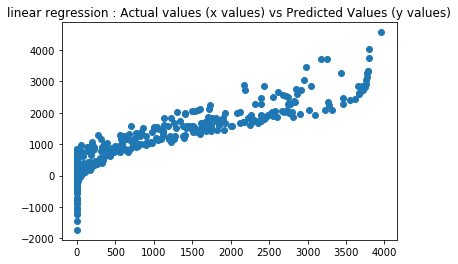

In [11]:
#split the data to train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)
#import LinearRegression object to do linear regression
from sklearn.linear_model import LinearRegression
#Initiate linear regression
multiple_lr = LinearRegression()
#Initiate the pipeline where the preprocessing will happen
pipe = Pipeline(steps=[('trans',column_trans),('scaler',StandardScaler()), ('classifier', multiple_lr)])
#Paramters which this case will use default paramters
param_grid = {}
#Initiate GridSearchCV. Paramters are:
#pipe which is the pipeline will be used
#param_grid which is empty because default paramters will be used
#cv = 10 means there will be 10 fold cross-validation happen
linear_gscv = GridSearchCV(pipe, param_grid, cv=10 , refit = True)
#Fit the data
pipe.fit(X_train,y_train)
#Make prediction 
predictions= pipe.predict(X_test)
#Show the assesment here
print('MAE for linear regression:', metrics.mean_absolute_error(y_test, predictions))
print('MSE for linear regression:', metrics.mean_squared_error(y_test, predictions))
print('RMSE for linear regression:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.title('linear regression : Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,predictions)

MAE for Gradient boosting regression: 337.65012429184793
MSE for Gradient boosting regression: 227852.3901752981
RMSE for Gradient boosting regression: 477.3388630473095


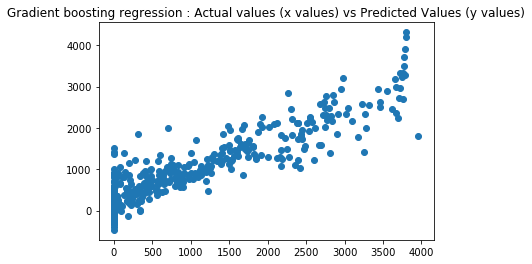

In [12]:
#split the data to train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)
#import ensemble object to do gradient boosting regression
from sklearn import ensemble
#initiate GradientBoostingRegressor
gboost_reg = ensemble.GradientBoostingRegressor()
#Initiate the pipeline where the preprocessing will happen
pipe = Pipeline(steps=[('trans',column_trans),('scaler',StandardScaler()), ('classifier', gboost_reg)])
##Parameters :
#classifier__n_estimators : how many estimation should happen
#classifier_max_depth : max depth of each tree
#classifier__learning_rate : learning rate of the classifier which is important to make it balanced.
#                            If it is too large than it can overfit 
param_grid = {'classifier__n_estimators': [567,750],
          'classifier__max_depth': [5],
          'classifier__min_samples_split': [7],
          'classifier__learning_rate': [0.01,0.1]}

#Use grid search with GradientBoostingRegressor, param_gid = parameters which will be searched and used, cv will 
#be equaled to 10 which will be 10 fold cross validation
search = GridSearchCV(pipe, param_grid, n_jobs=-1,cv = 10)
#Fit the model
search.fit(X_train, y_train)

print('MAE for Gradient boosting regression:', metrics.mean_absolute_error(y_test, search.predict(X_test)))
print('MSE for Gradient boosting regression:', metrics.mean_squared_error(y_test, search.predict(X_test)))
print('RMSE for Gradient boosting regression:', np.sqrt(metrics.mean_squared_error(y_test, search.predict(X_test))))
plt.title('Gradient boosting regression : Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,search.predict(X_test))

MAE for Support vector regression: 287.1743989822622
MSE for Support vector regression: 153452.56262418668
RMSE for Support vector regression: 391.7302166340844


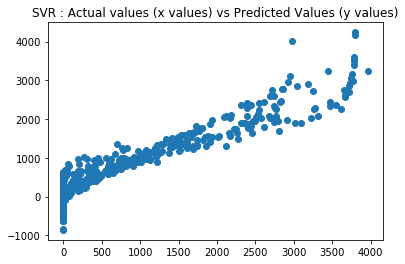

In [13]:
#split the data to train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)
# importing the support vector regression class from svm of scikit learn
from sklearn.svm import SVR

#Initiate the pipeline where the preprocessing will happen
pipe = Pipeline(steps=[('trans',column_trans),('scaler',StandardScaler()), ('classifier', SVR())])
# creating a dictionary containing potential values of alpha
param_grid = {'classifier__C': [0.1,1, 10, 100, 1000], 'classifier__gamma': [1,0.1,0.01,0.001,0.0001]}
#Use grid search with GradientBoostingRegressor, param_gid = parameters which will be searched and used, cv will 
#be equaled to 10 which will be 10 fold cross validation
SVR_reg= GridSearchCV(pipe, param_grid, cv=10 )
#Fit the data
SVR_reg.fit(X_train,y_train)
#Make predictions using X_test of the data
predictions= SVR_reg.predict(X_test)
#Make assesment of the prediction
print('MAE for Support vector regression:', metrics.mean_absolute_error(y_test, predictions))
print('MSE for Support vector regression:', metrics.mean_squared_error(y_test, predictions))
print('RMSE for Support vector regression:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.title('SVR : Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,predictions)

In [14]:
SVR_reg.best_params_

{'classifier__C': 1000, 'classifier__gamma': 0.01}

In [15]:
#Get the testing data
TestingData = pd.read_csv("CE802_P3_Test.csv")

In [16]:
#Create variable which is copy of TestingData
TestingData_orig = TestingData.copy()

In [17]:
#Get the test data's features
X_test = TestingData_orig.drop('Target',axis=1)
#Get the testing data's "Target" values
y_test = TestingData_orig['Target']

In [18]:
#Change values in Target columns in TestingData_orig
TestingData_orig.loc[:,"Target"] =  SVR_reg.predict(X_test)

In [19]:
#Save TestingData_orig dataset to computer
TestingData_orig.to_csv('output/CE802_P3_Test.csv')